# Введение в статистику и библиотека Scipy

Схема доставки заказа клиенту DC.

<img width = '750px' src="images/lesson_6/zone.png">

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools

import random

from IPython.display import *

from scipy import stats

### Выборка и генеральная совокупность

**Генеральная совокупность** – это совокупность всех мысленно возможных объектов данного вида, над которыми проводятся наблюдения с целью получения конкретных значений определенной случайной величины.

**Выборкой** (выборочной совокупностью) называется совокупность случайно отобранных объектов из генеральной совокупности.

### 1. Описательная статистика

Допустим, у нас есть не случайная выборка данных, а вся **генеральная совокупность** заказов в зоне под номером 13 за всю историю работы платформы DC. Попробуем ее теоретически построить.

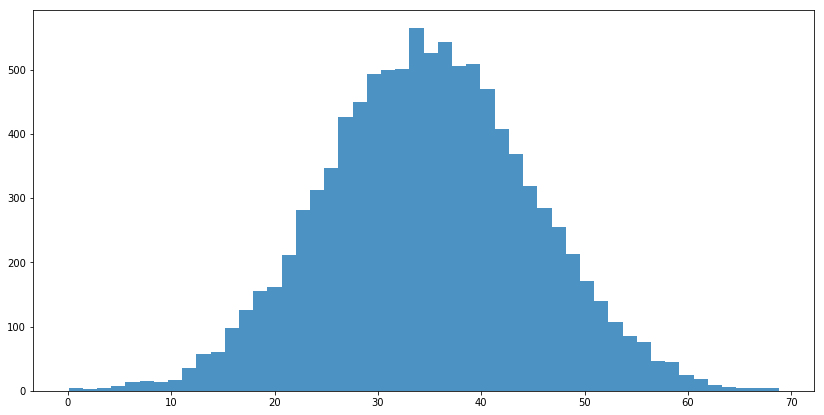

In [4]:
norm_rv1 = stats.norm(loc=35, scale = 10)

#генерирует случайные значения из распредления norm_rv1
gen_pop = norm_rv1.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.8)
plt.show()

Основные меры концентрации:
- медиана;
- мода;
- среднее арифметическое;
- перцентили.

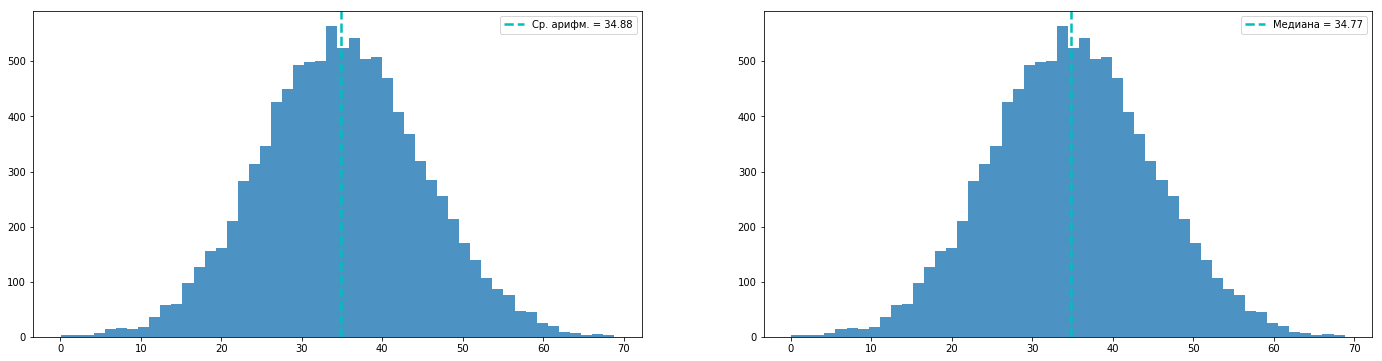

In [5]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(gen_pop, 50, alpha=0.8)
line1 = plt.axvline(np.mean(gen_pop), label=('Ср. арифм. = '+str(round(np.mean(gen_pop), 2))), color='c', linestyle='dashed', linewidth=2.5)
ax1.legend(handles=[line1])

ax2 = plt.subplot(122)
plt.hist(gen_pop, 50, alpha=0.8)
line2 = plt.axvline(np.median(gen_pop), label=('Медиана = '+str(round(np.median(gen_pop), 2))), color='c', linestyle='dashed', linewidth=2.5)
ax2.legend(handles=[line2])

plt.show()

Основные меры распределения:
- среднеквадратическое отклонение;
- дисперсия.

Для генеральной совокупности данных:

среднее  - $ \mu =  \frac{1} {N} \sum_{i=1}^N (x_i) $

дисперсия - $ \sigma^2 = { \frac{1} {N} \sum_{i=1}^N (x_i - \mu)^2}$

среднеквадратическое отклонение - $ \sigma = \sqrt{ \frac{1} {N} \sum_{i=1}^N (x_i - \mu)^2}$

In [6]:
mean_ = np.mean(gen_pop)
var_ = np.var(gen_pop)
std_ = np.std(gen_pop)
percentile_10 = np.percentile(gen_pop,10)

Распределение генеральной совокупности имеет вид колокола, называется **нормальным** или **гауссовским** и описывается формулой:

$ pdf(x,\mu,\sigma) = \frac{1}{ \sigma\sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)}$

<img width = '500px' src="images/lesson_6/d0ff538d59154901b18a98469de07fde.png">

### Выборочные оценки

Зачастую у нас нет возможности работы с генеральной совокупностью, мы имеем дело только с выборкой, то есть мы не можем точно знать значения дисперсии и стандартного отклонения, поэтому данные показатели мы можем лишь оценить.

Среднее генеральной совокупности через **выборочное среднее**:

$ \overline{X} =  \frac{1} {n} \sum_{i=1}^n (x_i) $, здесь n - объем выборки.

Стандартное отклонение через **выборочное стандартное отклонение**:

$ S = \sqrt{ \frac{1} {n-1} \sum_{i=1}^n (x_i - \overline{X})^2}$.

Разброс значений в пределах выборки никогда не бывает столь большим, как во всей совокупности, и деление не на n, а на n – 1 компенсирует возникающее занижение оценки стандартного отклонения.


In [7]:
#выборка
zone_orders_sample = random.sample(list(gen_pop), 1000) 

In [8]:
sample_std = np.std(zone_orders_sample, ddof = 1)
# ddof задает делитель как (N - ddof)

Разные выборки из генеральной совокупности могут отличаться от самой генеральной совокупности, то есть при оценке генеральной совокупности через выборку мы можем ошибаться. Такая ошибка называется **стандартная ошибка**. Рассчитывается для любого показателя, чаще всего используется **стандартная ошибка среднего** (т.е. оценивает точность, с которой выборочное среднее оценивает среднее генеральной совокупности).

истинная стандартная ошибка - $ {\sigma }_{\bar {x}}\ ={\frac {\sigma }{\sqrt {N}}} $

оценка стандратной ошибки по выборке - $ {S }_{\bar {x}}\ ={\frac {S }{\sqrt {n}}} $

Чем больше выборка, тем точнее оценка среднего и тем меньше
его стандартная ошибка. Чем больше изменчивость исходной
совокупности, тем больше изменчивость выборочных средних,
поэтому стандартная ошибка среднего возрастает с увеличением
стандартного отклонения совокупности.

**В отличие от стандартного
отклонения стандартная ошибка среднего ничего не
говорит о разбросе данных, — она лишь показывает точность
выборочной оценки среднего.**

### 2. Проверка гипотез

Пайплайн оценки статистической значимости:
- Формулирование нулевой гипотезы (H0);
- Оценка вероятности получить наблюдаемые (или более сильные) различия при условии справедливости нулевой гипотезы;
- Принятие либо отвержение нулевой гипотезы.

### 2.1 Однофакторный дисперсионный анализ

**Задача**. Курьерам выдали электроскутеры, велосипеды, электровелосипеды и самокаты. 
Понять, отличается ли как-то скорость доставки заказов клиентам в этих группах/все ли выборки взяты из одного (схожего) распредления /какова вероятность получить такие различия в группах, которые будут найдены извлекая случайные выборки из генеральной совокупности?

В теории, если курьерам выдали электроскутеры, то среднее в распредлении будет смещено влево - то есть среднее время доставки заказов в теории должно уменьшиться.
Представим другую ситуацию - курьерам сложно овладевать новой техникой, они тратят много времени на то, чтобы пристегнуть/запустить ее, то есть среднее время доставки не поменялось, данные по среднему времени доставки заказов пришли из **одного распределения**. 

Представим, Извлечем из нашей совокупности 4 случайные подгруппы по 10 заказов в каждой.

In [9]:
sample_groups = []
[sample_groups.append(np.random.choice(gen_pop, size = 10)) for x in range(100)]
sample_groups

[array([14.20760055, 34.63302896, 47.34162291, 47.46480331, 42.99062878,
        39.2751526 , 48.75124714, 35.87185847, 22.27708556, 14.84465437]),
 array([34.03994602, 46.79975274, 29.51126291, 24.43783833, 46.19745442,
        36.09981265, 31.21312795, 22.4853837 , 32.35581028, 34.95932895]),
 array([30.68953014, 36.57511863, 37.82525816, 55.24514013, 31.42166413,
        47.61868012, 30.0211683 , 35.72616501, 31.06683424, 20.46295223]),
 array([ 1.10794376, 35.76316738, 37.68253952, 23.8932144 , 18.49745224,
        25.70867958, 36.87129755, 36.51139937, 26.57973074, 28.3544857 ]),
 array([37.30552306, 47.01778518,  4.50648825, 55.40934931, 49.7832732 ,
        40.7501675 , 32.96549952, 16.2625721 , 25.08024665, 33.40433188]),
 array([31.67105197, 35.27222034, 39.94158624, 34.55687626, 31.47502889,
        29.2389885 , 58.65362191, 18.14515463, 40.39006853, 30.05310544]),
 array([33.82560019, 51.47683411, 41.73926306, 17.26484459, 39.26692605,
        24.53630677, 37.53754434, 30.18

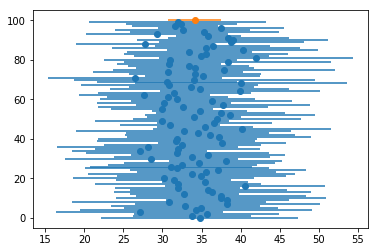

In [10]:
#Средние каждой выборки, их стандартное отклонение, а также стандартное отклонение средних и среднее средних
x = np.mean(sample_groups,axis = 1)
y = np.arange(len(sample_groups))
e = np.std(sample_groups,axis = 1)

plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')

plt.errorbar( np.mean(x), len(y) ,xerr =  np.std(x), linestyle='None', marker='o')

plt.show()

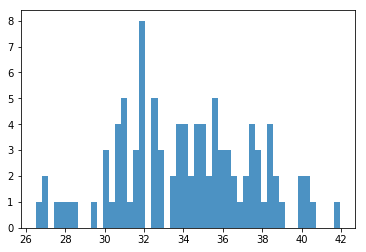

In [11]:
plt.hist(np.mean(sample_groups, axis =1 ), 50, alpha=0.8)
plt.show()

Также, дисперсия правильно характеризует разброс только в том случае, если совокупность имеет нормальное распределение. Анализ применим **только** для нормально распределенных совокупностей.

Проверим следующие гипотезы:

H0 - выборки взяты из одной совокупности 

H1 - выборки взяты из разных совокупностей

Просто дисперсонный анализ проверяет что чем больше разброс средних и чем меньше разброс значений внутри групп, тем меньше вероятность
того, что наши группы — это случайные выборки из одной совокупности.

**F** = $ \frac{\text{Дисперсия совокупности,оцененная по выборочным средним}} {\text{Дисперсия совокупности, оцененная по выборочным дисперсиям}} =  \frac{Sмеж.^2} {Sвнутр.^2} = SST = \frac{\frac{SSB} {m-1}} {\frac{SSW} {N - m}} $

$ SST - \text{общая изменчивость}, $ 
$ SSB - \text{межгрупповая изменчивость}, $ 
$ SSW - \text{внутригрупповая изменчивость}$ 

***

In [12]:
F, p = stats.f_oneway(sample_groups[0],sample_groups[1],sample_groups[2],sample_groups[3])

In [13]:
F

1.320442882258983

p - вероятность ошибочно отвергнуть верную нулевую гипотезу, то есть найти различия там, где их нет.

In [14]:
p

0.28280571235378604

Мы не можем отвергнуть гипотезу H0, p >0.05.

Сверимся с таблицей - http://gym42.ru/stat/Book/Data/page_7.htm.

Посмотрим, что такое F, будем из нашей выборки извлекать выборки и считать F.

In [15]:
def calculate_random_sample_group(sz = 10):
    sample_groups = []
    for i in range(4):
        sample_groups.append(np.random.choice(gen_pop, size = sz))
    F, p = stats.f_oneway(sample_groups[0],sample_groups[1],sample_groups[2],sample_groups[3])    
    return sample_groups, F

Fs = []
sgs = []
for i in range(100000):
    sg,F = calculate_random_sample_group()
    Fs.append(F)
    sgs.append(sg)

Распределение приняло опредленную форму, такое распредление называется распредление Фишера.

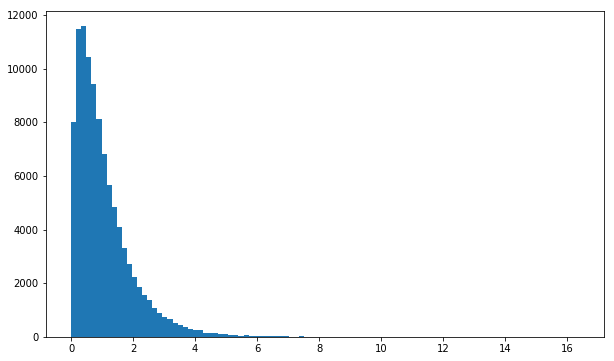

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Fs,bins = 100)
plt.show()

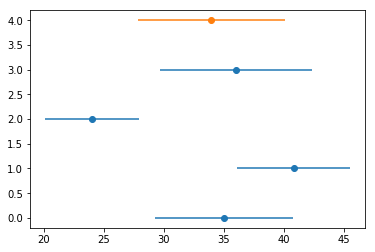

In [17]:
sample_groups_ = sgs[Fs.index(max(Fs))]


x = np.mean(sample_groups_,axis = 1)
y = np.arange(len(sample_groups_))
e = np.std(sample_groups_,axis = 1)

plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')

plt.errorbar( np.mean(x), len(y) ,xerr =  np.std(x), linestyle='None', marker='o')

plt.show()

Совсем не похоже, что выборки взяты из одного распредлеения, хотя это на самом деле так. Выбирая F-критическое, мы сами задаем , с какой веротяностью мы допускаем ошибочное отвержение нулевой гипотезы.

### Классификация критериев

1. **Одновыборочные** - проверяют гипотезы относительно ОДНОЙ выборки.
2. **Двувыборочные со связанными выборками** - элементы выборок являются парными результатами повторных измерений, выполненных в одном и том же множестве элементов. 
3. **Двувыборочные с несвязанными выборками** - элементы выборок НЕ являются парными результатами повторных измерений, выполненных в одном и том же множестве элементов. 

### 2.2 Критерий Стьюдента

### Критерий Стьюдента для несвязанных выборок

Частный случай дисперсионного анализа - применение критерия Стьюдента, позволяет проверять значимость различий двух групп.

**Задача**. Курьерам выдали электроскутеры, велосипеды, электровелосипеды и самокаты. 
Понять, отличается ли как-то скорость доставки заказов клиентам на электросамокатах от скорости доставки на велосипедах.

In [18]:
# Построим две новые теоретические генеральные совокупности:
# курьеры, которые доставляли на велосипедах:
norm_vel = stats.norm(loc=37, scale = 10)
# курьеры, которые доставляли на электросамокатах:
norm_sam = stats.norm(loc=30, scale = 13)

In [19]:
norm_vel_sample = norm_vel.rvs(size=50)
norm_sam_sample = norm_sam.rvs(size=50)

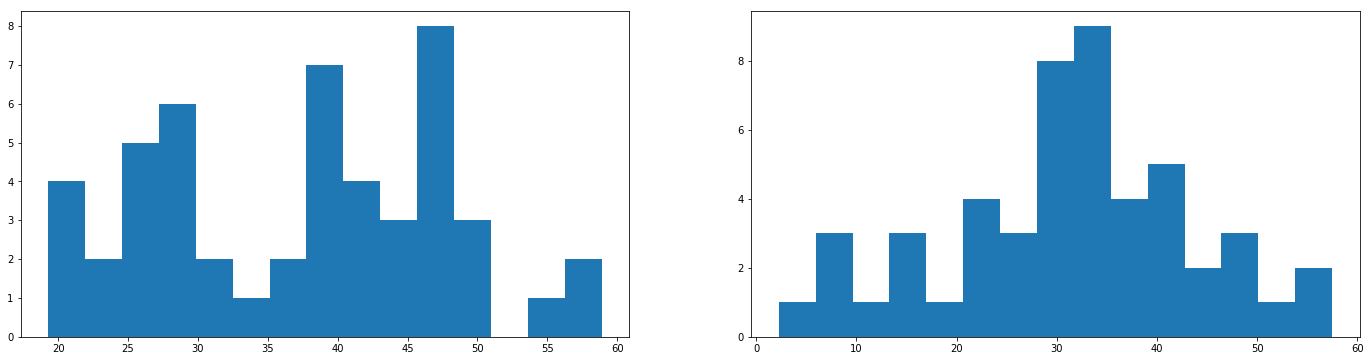

In [20]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(norm_vel_sample, 15)

ax2 = plt.subplot(122)
plt.hist(norm_sam_sample, 15)

plt.show()

t-критерий Стьюдента:

**t** = $ \frac{\text{Разность выборочных средних}} {\text{Стандартная ошибка разности выборочных средних} } = \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}}  = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ S_{\overline{X_1}}^2 +  S_{\overline{X_2}}^2 } } = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ \frac{S_1^2} {n_1} +  \frac{S_2^2} {n_2} } } $

In [21]:
stats.ttest_ind(norm_vel_sample, norm_sam_sample)

Ttest_indResult(statistic=2.5964104866133138, pvalue=0.010869060643648789)

Нулевая гипотеза отвергается при 5-% уровне значимости, действительно, выборки взяты из разных распределений.

Еще раз посмотрим, что будет, если много раз делать выборки из одной и той же совокупности и считать статистики.

In [22]:
def calculate_random_sample_group(sz = 50):
    sample_groups = []
    for i in range(2):
        sample_groups.append(np.random.choice(gen_pop, size = sz))
    t, p = stats.ttest_ind(sample_groups[0], sample_groups[1] )    
    return sample_groups, t

ts = []
sgs = []
for i in range(10000):
    sg,t = calculate_random_sample_group()
    ts.append(t)
    sgs.append(sg)

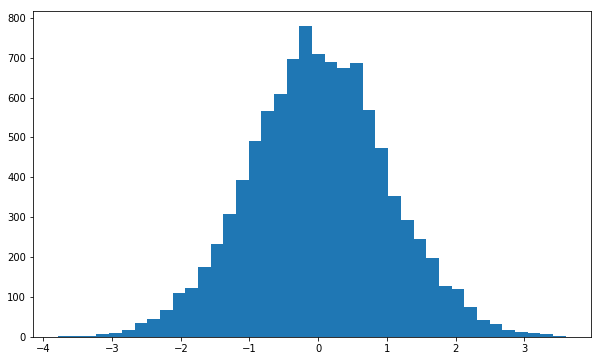

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(ts,bins = 40)
plt.show()

Распределение Стьюдента, имеет более тяжелые хвосты, чем нормальное.

### Критерий Стьюдента для связанных выборок

**Задача**. А что, если хотим сравнить, как изменилась скорость курьеров у одних и тех же курьеров? Тогда имеем дело с парным критерием Стьюдента или двувыборочным критерием Стьюдента для связанных выборок.

<img width = '400px' src="images/lesson_6/pp.png">

t = $\frac{\overline{d}} {S_{\overline{d}}} $, где $\overline{d} $ - среднее изменений, $S_{\overline{d}}$ - стандартная ошибка.

Если обычный критерий Стьюдента требует нормального распределения самих данных, то парный критерий Стьюдента требует нормального распределения их изменений.

In [24]:
df_ = pd.DataFrame()
df_['courier_id'] = np.array([1, 2, 3, 4, 5, 6])
df_['couriers_without_bike_time'] = np.array([39, 49, 47, 39, 28, 26])
df_['couriers_with_bike_time'] = np.array([29, 53, 43, 39, 33, 30])
df_.head()

,courier_id,couriers_without_bike_time,couriers_with_bike_time
0,1,39,29
1,2,49,53
2,3,47,43
3,4,39,39
4,5,28,33


H0: среднее время доставки курьеров на велосипеде и без велосипеда равны

H1: среднее время доставки курьеров на велосипеде не равны

In [25]:
#Корректно только в случае, если два распредления - одни и те же курьеры
stats.ttest_rel(df_.couriers_without_bike_time, df_.couriers_with_bike_time)

Ttest_relResult(statistic=0.06943774745378857, pvalue=0.9473327114146763)

### Множественные сравнения

Если исследуемых групп больше двух, то следует воспользоваться дисперсионным анализом. Однако дисперсионный анализ позволяет проверить лишь гипотезу о равенстве всех средних.
Но если гипотеза не подтверждается, нельзя узнать какая именно группа отличается от других.

Эффект множественных сравнений состоит в том, что при многократном применении критерия вероятность ошибочно найти различия там, где их нет возрастает и составляет P = $ 1 - (1 - \alpha) ^ k $, k - число сравнений, $ \alpha $ - установленный уровень значимости.

**Поправка Бонферонни** заключается в том, что достигаемые уровни значимости гипотез сравниваются с уровнем значимости $ \frac{\alpha} {k}$.

Поправка Бонферонни - один из самых консервативных методов. Также часто используют метод Холма, метод Бенджамини-Хохберга, которые не столь консервативны. 

### Одновыборочный критерий Стьюдента

$ t = \frac{\overline{X} - \mu} {\frac{S}{\sqrt{n}}} $

Задача: оценить эффективность доставки курьерами заказов.

H0 - среднее время доставки на велосипеде равно 37 минутам

H1 - среднее время доставки на велосипеде не равно 37 минутам

In [26]:
stats.ttest_1samp(a = norm_vel_sample , popmean = 37)

Ttest_1sampResult(statistic=0.15070708509235137, pvalue=0.8808254903442152)

### 2.3 Проверка распределений на нормальность

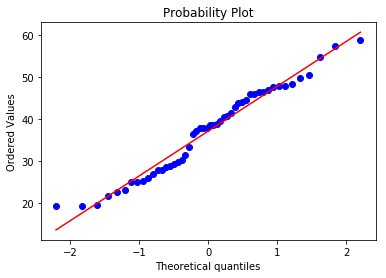

In [27]:
#c помощью Q-Q графика
stats.probplot(norm_vel_sample, dist = "norm", plot = plt)
plt.show()

Как строится:

1. берём 0.01-квантиль теоретического (с которым сравниваем) распределения, например нормального -- это x1(≈-2.33 для нормального). 
2. берём 0.01-квантиль нашей выборки -- это y1. Рисуем на графике точку (x1,y1). 
3. берём 0.02-квантиль теоретического распределения -- это x2, и 0.02-квантиль выборки -- это y2. Опять рисуем на графике точку (x2,y2).


И так далее. Естественно, рисовать точки можно с любым шагом, не только 0.01.
Распределения одинаковые, если все эти точки попадут на прямую y=x. Если на другую прямую, то это значит, что распределения одинаковы с точностью до нормализации.

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [28]:
#c помощью критерия Шапиро- Уилка
stats.shapiro(norm_vel_sample)

(0.9633824825286865, 0.12319130450487137)

### Анализ качественных признаков

**Качественные признаки** - признаки не связаны между собой никакими арифметическими соотношениями, упорядочить их также нельзя.
Единственный способ описания качественных признаков состоит в том, чтобы подсчитать число объектов, имеющих одно и то же значение. Кроме того, можно подсчитать, какая доля от
общего числа объектов приходится на то или иное значение.

### 2.4 Критерий для доли

### Z-критерий для несвязанных выборок

Для проверки гипотезы о равентсве долей используется критерий аналогично критерию Стьюдента t.

**z** = $ \frac{\text{Разность выборочных долей}} {\text{Стандартная ошибка разности выборочных долей}}  = \frac{\hat{p_1}-\hat{p_2}} {{S_{\hat{p_1} - \hat{p_2}}}}  = \frac{\hat{p_1}-\hat{p_2}} { \sqrt{ S_{\hat{p_1}}^2 +  S_{\hat{p_2}}^2 } } = \frac{\hat{p_1}-\hat{p_2}} { \sqrt{ \frac{\hat{p_1}(1-\hat{p_1})} {n_1} +  \frac{\hat{p_2}(1-\hat{p_2})} {n_2} } } $


**z**  $= \frac{|\hat{p_1}-\hat{p_2}| - \frac{1} {2} (\frac{1} {n_1} + \frac{1} {n_2} ) } { \sqrt{ \frac{\hat{p_1}(1-\hat{p_1})} {n_1} +  \frac{\hat{p_2}(1-\hat{p_2})} {n_2} } }$

Корректно использовать в том случае, когда n*p и n*(1 − p) превосходят 5 для всех групп.

**Задача.** DC работает над новым баннером, который хочет разместить на одной из своих рекламных площадок. Было придумано 2 варианта баннеров (A и B). На первый баннер за первые сутки кликнуло 100 человек из 300 посетителей, на второй баннер 400 человек из 800 посетителей. Решить,какой баннер оставлять.

H0: доля кликов по двум баннерам одинакова

H1: доля кликов по баннеру B больше, чем по баннеру А ('smaller')

In [29]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([100, 300])
nobs = np.array([300, 800])
proportions_ztest(count, nobs, alternative='smaller')

(-1.279415789297898, 0.10037533831983553)

В итоге, исходная гипотеза подтвердилась.

Нулевое распредление для данной статистики будет нормальное распределение с парамтерами (0,1).

### Z-критерий для связанных выборок

<img width = '400px' src="images/lesson_6/two_prop.png">

**z** = $\frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$

**Задача.** DC решило поменять один из существующих баннеров на площадке VK. Изменило цвет баннера с зеленого на светло-зеленый. Проверить гипотезу о том, что на новый баннер стали кликать чаще.

In [30]:
#Клики на старый баннер
banner_clicks_dark_green = [0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
banner_clicks_light_green = [1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1]

In [31]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [32]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return z_stat,2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return z_stat,scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return z_stat, 1 - scipy.stats.norm.cdf(z_stat)

In [33]:
import scipy
proportions_diff_z_test(proportions_diff_z_stat_rel(banner_clicks_dark_green,banner_clicks_light_green),'less' )

(1.0215078369104984, 0.8464930509830875)

### Одновыборочный критерий для доли

**Задача**. Также могли решать задачу одновыборочного критерия для доли: хотим проверить гипотезу о том, что на баннер A кликают в 50% случаев. 

**z** = $ \frac{\hat{p}-p_0 } {\sqrt{ \frac{p_0 * (1 - p_0)} {n} }} $

In [34]:
count = np.array(100)
nobs = np.array(300)
value = 0.5
proportions_ztest(count, nobs, value = value)

(-6.123724356957946, 9.141298408246598e-10)

Нулевая гипотеза отвергается.

### 2.5 Критерий Хи-квадрат

Применим, когда число значений признака и число выборок может оказаться большим двух.

Рассмотрим задачу про размещение баннеров, но теперь будем рассматривать уже не доли, а числа.

In [35]:
from scipy.stats import chi2_contingency

In [36]:
banner_data = pd.DataFrame()
banner_data['clicked'] = [100,400,500]
banner_data['non_clicked'] = [200, 400,600]
banner_data.index = ['Баннер_A', 'Баннер_B','Итого']
banner_data['Total'] = banner_data['clicked'] + banner_data['non_clicked']
#Аналогичную таблицу с агрегациями можно получить с помощью функции pd.crosstab, установив парамет margins = True
banner_data

,clicked,non_clicked,Total
Баннер_A,100,200,300
Баннер_B,400,400,800
Итого,500,600,1100


При работе с критерием хи-квадрат встречается понятие, как таблица ожидаемых значений.

Примем нулевую гипотезу H0, что кликабельность по баннерам A и B одинакова, тогда:

In [37]:
clicked_total = 500/1100
non_clicked_total = 600/1100

Если баннера не влияют на кликабельность, то есть поведение клиентов при посещении сайта должно быть схожим с общим.

In [38]:
banner_A_clicked = clicked_total* 300
banner_B_clicked = clicked_total* 800

banner_A_non_clicked = non_clicked_total* 300
banner_B_non_clicked = non_clicked_total* 800

In [39]:
banner_data_E = pd.DataFrame()
banner_data_E['clicked'] = [banner_A_clicked,banner_B_clicked,500]
banner_data_E['non_clicked'] = [banner_A_non_clicked, banner_B_non_clicked,600]
banner_data_E.index = ['Баннер_A', 'Баннер_B','Итого']
banner_data_E['Total'] = banner_data_E['clicked'] + banner_data_E['non_clicked']
banner_data_E

,clicked,non_clicked,Total
Баннер_A,136.363636,163.636364,300.0
Баннер_B,363.636364,436.363636,800.0
Итого,500.000000,600.000000,1100.0


Реальная картина отличается от той, что была бы, если бы баннеры не отличались по своей кликабельности.

$\chi^2  = \sum {   \frac{(O - E)^2} {E}  } $, O  - наблюдаемое значение, E - ожидаемое значение.

$\chi^2  = \sum {   \frac{|O - E| - \frac{1} {2}} {E}  } $ (с поправкой Йеитса - только для таблиц 2х2)

In [40]:
chi2, p, dof, ex = chi2_contingency(banner_data.iloc[:2,:2])

In [41]:
chi2,p,dof,ex

(23.776843750000012,
 1.0817608500977008e-06,
 1,
 array([[136.36363636, 163.63636364],
        [363.63636364, 436.36363636]]))

Нулевая гипотеза отвергается.

Аналогичное применение критерия мы можем использовать для любого количества объектов и наблюдений. 

С помощью критерия хи-квадрат мы также можем проверять любое из распредлений на нормальность или схожесть с любым другим теоретическим распредлением, самостоятельно задавая ожидаемые значения.

Для таблиц сопряженности размером 2×2 критерий χ2 применим только в случае, когда все ожидаемые числа больше 5. 
В этом случае критерии χ2 применим, если все ожидаемые числа не меньше 1 и доля клеток с ожидаемыми числами меньше
5 не превышает 20%. При невыполнении этих условии критерии χ2 может дать ложные результаты. 

### 2.6 Точный критерий Фишера

Используется для таблиц сопряженности 2х2, когда критерий χ2 неприменим - используется для очень малых выборок.

<img width = '500px' src="images/lesson_6/fisher_crit.png">

Просто перебор всех сочетаний.

In [42]:
banner_data = pd.DataFrame()
banner_data['clicked'] = [8,1]
banner_data['non_clicked'] = [2, 5]
banner_data.index = ['Баннер_A', 'Баннер_B']
banner_data

,clicked,non_clicked
Баннер_A,8,2
Баннер_B,1,5


In [43]:
stats.fisher_exact(banner_data)

(20.0, 0.03496503496503495)

Достоинством метода является соответствие полученного критерия точному значению уровня значимости p.

### 2.7 Ошибки первого и второго рода

<img width = '700px' src="images/lesson_6/errors.jpg">

<img width = '500px' src="images/lesson_6/stat26.jpg">

<img width = '500px' src="images/lesson_6/errors.png">

### 2.8 Доверительные интервалы

Проверка гипотез - качественная оценка, с помощью доверительных интервалов можем получить количественную оценку.

**ДИ для разности средних**

Видоизменим формулу для t так, чтобы распределение были центрировано относительно 0, просто вычтя разность истинных средних распредления.

**t** = $ \frac{Разность выборочных средних - Разность истинных средних} {Стандартная ошибка разности выборочных средних} $

**t** = $ \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}} = \frac{(\overline{X_1}-\overline{X_2}) - (\mu_1 - \mu_2)} {{S_{\overline{X_1} - \overline{X_2}}}} $, также справедливо

$- t_{\alpha} < \frac{(\overline{X_1}-\overline{X_2}) - (\mu_1 - \mu_2)} {{S_{\overline{X_1} - \overline{X_2}}}} < + t_{\alpha}$,

$ (\overline{X_1}-\overline{X_2}) - t_{\alpha} S_{\overline{X_1} - \overline{X_2}} < \mu_1 - \mu_2 <  (\overline{X_1}-\overline{X_2}) + t_{\alpha} S_{\overline{X_1} - \overline{X_2}} $

Полученное неравенство задает доверительный интервал для разности средних.

In [44]:
#Расчет для задачи про курьеров на разных транспортных средствах
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(norm_vel_sample), sms.DescrStatsW(norm_sam_sample))
print (cm.tconfint_diff())

(1.4390701461933402, 10.77257904996603)


То есть, с 95% вероятностью можно утверждать, что с новыми самокатами курьеры уменьшили время доставки от 7 до 16 минуты.

**Если 100(1 – α)-процентный доверительный интервал разности средних не содержит нуля, то различия статистически значимы (Р < α); напротив, если этот интервал содержит ноль, то различия статистически не значимы (Р > α).**

С помощью доверительных интервалов мы точно также можем проверять статистические гипотезы.

In [109]:
cm = sms.CompareMeans(sms.DescrStatsW(norm_vel_sample), sms.DescrStatsW(norm_sam_sample))
print (cm.tconfint_diff(usevar='unequal',alpha=0.01))

(5.9278993838947045, 17.841944957275473)


Здесь уже утверждаем с вероятностью 99%.

**ДИ для среднего**

$ \overline{X} - t_{\alpha} S_{\overline{X}} < \mu <  \overline{X} + t_{\alpha} S_{\overline{X}} $

In [110]:
t = sms.DescrStatsW(norm_vel_sample)
t.tconfint_mean()

(34.86174671132335, 40.78984720224861)

То есть истинное среднее с 95% вероятностью лежит в интервале от 35 до 41 минуты.

**ДИ для разности долей**

$ (\hat{p_1}-\hat{p_2}) - z_{\alpha} S_{\hat{p_1} - \hat{p_2}} < p1 - p2 <  (\hat{p_1}-\hat{p_2}) + z_{\alpha} S_{\hat{p_1} - \hat{p_2}} $

In [ ]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

**ДИ для разности долей (связанные выборки)**

$$ \frac{f - g}{n} - z_{\alpha}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}} <p_1 - p_2 <  \frac{f - g}{n} + z_{\alpha}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [ ]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

**ДИ для доли**

$ \hat{p} - z_{\alpha} S_{\hat{p}}< p  < \hat{p} + z_{\alpha} S_{\hat{p}} $

In [111]:
import statsmodels
statsmodels.stats.proportion.proportion_confint

<function statsmodels.stats.proportion.proportion_confint(count, nobs, alpha=0.05, method='normal')>

### Непараметрические критерии

Непараметрические критерии не требуют соответствия какому-либо из распределений. Непараметрические критерии заменяют реальные значения признака рангами. 

По сравнению с парамтерическими критериями, непараметрические - менее чувствительны.

<img width = '800px' src="images/lesson_6/non_param.png">

### 2.9 Критерий знаков 

### Одновыборочный критерий

Очень простой критерий, не требует от выборки практически ничего. Его мощность составляет примерно 2/3 мощности критерия Стьюдента.

Проверим гипотезу о том, что курьеры на велосипедах доставляют заказ за 40 минут.

H0: med X = 40

H1: med X > 40

M = $ \frac {N(+) - N(-)} {2} $, где N(+) - кол-во значений больше проверяемого значения, N(-) - меньше.

Статистика данного критерия будет иметь биноминальное распределение.

In [112]:
N_plus = len([x for x in norm_vel_sample if x>40])
N_minus = len([x for x in norm_vel_sample if x<40])

In [113]:
M = (N_plus - N_minus)/2
M

-5.0

Статистика критерия имеет биноминальное распределение.

In [118]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(norm_vel_sample, 40)

(-5.0, 0.20263875106454063)

Гипотеза H0 принимается.

### Двувыборочный критерий для связанных выборок

Аналогично можно посчитать критерий для связанных выборок.

$ H0: P(X_1 > X_2) = \frac{1} {2}$

$ H1: P(X_1 > X_2) <> \frac{1} {2}$

Курьерам выдали велосипеды и записали среднее время, с которым они доставляли заказы до и после выдачи. 

In [126]:
df = pd.DataFrame()
df['courier_id'] = np.arange(0,100)
df['time_before'] = norm_rv1.rvs(size=100)
df['time_after'] = norm_rv1.rvs(size=100)
df['stat_M'] = np.where(df.time_before > df.time_after,1,0)
df.head()

,courier_id,time_before,time_after,stat_M
0,0,14.958413,32.637648,0
1,1,45.472276,37.078157,1
2,2,30.318652,37.143199,0
3,3,25.775910,47.052992,0
4,4,27.991204,33.508611,0


Аналогично одновыборочному критерию:

In [129]:
N_plus = df.stat_M.sum()
N_minus = df.shape[0] - N_plus

In [131]:
M = (N_plus - N_minus)/2
M

-2.0

In [128]:
sign_test(df.time_before - df.time_after)

(-2.0, 0.7643534344026666)

### Ранговые критерии

Ранговые критерии выбрасывают большую часть информации, вместо значений используют лишь бинарный вектор, ранговые критерии сохрнаяют больше информации. Ранг - позиция элемента в вариационном ряду. 

### 2.10 Критерий знаков рангов Уилкоксона

### Одновыборочный критерий

$H0: medX = m0$

$H1: medX <> m0$
    
$ статистика: W = \sum_{i=1}^N rank(|Xi −m0|)·sign(Xi −m0)$

Нулевое распределение данного критерия - табличное.

При справедливости нулевой гипотезы каждый из рангов в выборке мог с одинаковой вероятностью реализоваться с любым знаком (sign(Xi −m0)): и с «+», и с «−». Таким образом, получается $2^n$ вариантов распределения знаков по рангам.

<img width = '200px' src="images/lesson_6/ranks_.png">

Перебирая все эти варианты, для каждого из них можно вычислить значение статистики.

<img width = '500px' src="images/lesson_6/distr.png">

Ограничения: число измерений - от 5 до 50.

**Задача** - проверить, среднее время доставки заказа курьеров на велосипеде равно 40 минутам.

In [133]:
m0 = 40

In [134]:
stats.wilcoxon(norm_vel_sample)

WilcoxonResult(statistic=0.0, pvalue=7.556929455863566e-10)

### Двувыборочный критерий со связанными выборками

$H0: med(X_1 - X_2) = 0 $

$H1: med(X_1 - X_2) <> 0 $
    
$ статистика: W = \sum_{i=1}^N rank(|X_{1i} − X_{2i}|)·sign(X_{1i} − X_{2i})$

Аналогично одновыборочному критерию.

**Задача** - проверить, значимо ли изменилось время доставки курьеров после выдачи им велосипедов.

In [184]:
stats.wilcoxon(df.time_before.iloc[:50],df.time_after.iloc[:50])

WilcoxonResult(statistic=497.0, pvalue=0.175008298276776)

### 2.11 Критерий Манна-Уитни

### Двувыборочный критерий с несвязанными выборками

$ H_0: F_{X_{1}} (x) =  F_{X_{2}} (x) $
    
$ H1: F_{X_{1}} (x) =  F_{X_{2}} (x + ∆),∆ <> 0 $

$статистика: R = \sum_{i = 1} ^ N rank(X_{1i}) $

Нулевое распределение - табличное (https://statpsy.ru/mana-uitni/tablica-manna-uitni/).

Критерий подходит для сравнения малых выборок: в каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было 2 значения, но во второй тогда должно быть не менее пяти.

**Задача** - сравнить, 

In [146]:
stats.mannwhitneyu(norm_vel_sample, norm_sam_sample)

MannwhitneyuResult(statistic=569.0, pvalue=1.3577416352606376e-06)

### 2.12 Перестановочные критерии

При использовании ранговых критериев выборки превращают в ранги, затем делается какое-то дополнительное предположение, и на основании этого предположения получается, что разные конфигурации этих рангов при справедливости нулевой гипотезы могут реализоваться с равной вероятностью. Далее необходимо перебрать все конфигурации, и на каждой посчитать значение статистики — таким образом оценивается ее нулевое распределение.

Если в этом алгоритме пропустить первый пункт(не превращать наблюдения в ранги),а остальное делать точно так же, то получится алгоритм работы перестановочных критериев.

### Одновыборочный критерий

$ H0: EX = m0 $
    
$ H1: EX <> m0 $

 Одновыборочный перестановочный критерий проверяет нулевую гипотезу о значении математического ожидания случайной величины, из которой взята выборка. 

$ T = \sum_{i = 1} ^ N (X_{i} - m_0)$

Нулевое распределение порождается путем перебора $2^n$ знаков перед слагаемыми $ X_{i} - m_0 $.

**Задача** - проверить, среднее время доставки заказа курьеров на велосипеде равно 40 минутам.

In [151]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(map(lambda x: x - mean, sample))
    return t_stat

In [163]:
permutation_t_stat_1sample(norm_vel_sample, 40)

-108.71015216070111

Статистика критерия посчитана, теперь необходимо получить нулевую статистику при верности нулевой гипотезы.

In [173]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))

    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        #перебор всех возможных позиций элементов массива 
        signs_array =  itertools.product([-1, 1], repeat = len(sample))  
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

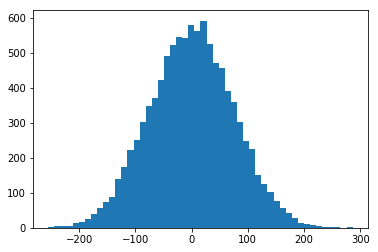

In [174]:
plt.hist(permutation_zero_distr_1sample(norm_vel_sample,40,10000), bins = 50)
plt.show()

In [176]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [177]:
permutation_test(norm_vel_sample, 40,10000)

0.1495

### Двувыборочный критерий для зависимых выборок

$ H0: E(X_1 - X_2) = 0 $
    
$ H1: E(X_1 - X_2) <> 0$

Двухвыборочная задача со связанными выборками решается с использованием абсолютно такого же критерия: от двух связанных выборок происходит переход к одной выборке соответствующих попарных разностей.

$ T = \sum_{i = 1} ^ N (D_i)$

Нулевое распределение порождается путем перебора $2^n$ знаков перед слагаемыми $ D_{i}$.

**Задача** - проверить, значимо ли изменилось время доставки курьеров после выдачи им велосипедов.

По аналогии с одновыборочным критерием, только теперь среднее 0 и в качестве данных - разница выборок.

In [186]:
permutation_test(df.time_after.iloc[:50] - df.time_before.iloc[:50],0,100000)

0.16893

### Двувыборочный критерий для независимых выборок.

Перестановочный критерий для независимых выборок выглядит абсолютно так же, как критерий МаннаУитни за исключением того, что не производятся ранговые преобразования. 

$ H_0: F_{X_{1}} (x) =  F_{X_{2}} (x) $
    
$ H1: F_{X_{1}} (x) =  F_{X_{2}} (x + ∆),∆ <> 0 $

$ T = \frac{1} {n_1} \sum_{i = 1} ^ {N_1} X_{1i} - \frac{1} {n_2}  \sum_{i = 1} ^ {N_2} X_{2i}  $

Нулевая статистика получается по аналогии с критерием Манна-Уитни путем перебора размещений объединенной выборки.

**Задача** - понять, отличается ли как-то скорость доставки заказов клиентам на электросамокатах от скорости доставки на велосипедах.

In [205]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [196]:
def get_random_combinations(n1, n2, max_combinations):
    index = np.arange(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [197]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

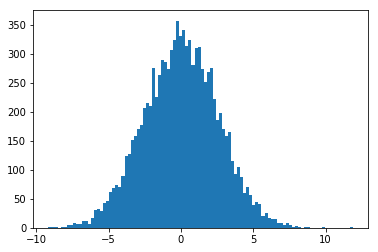

In [200]:
plt.hist(permutation_zero_dist_ind(norm_vel_sample, norm_sam_sample, max_combinations = 10000), bins = 100)
plt.show()

In [206]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [213]:
permutation_test(norm_vel_sample, norm_sam_sample, max_permutations = 100)

0.01

In [ ]:
month_year = data.pivot_table('temperatureMean','month', 'year')
month_year['month'] = new_index
month_year.index = month_year.month
month_year = month_year.drop(['month'], axis = 1)
day_year = data.pivot_table('temperatureMax', 'day', 'year')
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.heatmap(month_year, fmt="g",annot=True,linewidths=.5, cmap='RdYlBu_r', cbar_kws={'label': 'Mean temperature'}, ax=ax[0])
sns.heatmap(day_year, fmt="g",yticklabels=15, cmap='RdYlBu_r', cbar_kws={'label': 'Mean temperature'}, ax=ax[1])
plt.show()